3. Jupyter notebook that ingests a FASTa file

In [1]:
# Install Biopython
!pip install biopython

# Import required libraries
from Bio import SeqIO
import os
import matplotlib.pyplot as plt


In [3]:
file_name = '/final_assignment_dataset.fastq'

a. Demultiplexes any libraries that are present in it

In [4]:
template1 = "ATCGATCGATAGCTAGCTTT"
template2 = "TAGCTAGCTAGCTATATTAG"
index1 = "ATGCTA"
index2 = "CGATAG"

# Function to calculate Hamming distance
def hamming_distance(seq1, seq2):
    """Calculate the Hamming distance between two sequences."""
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of the same length")
    return sum(el1 != el2 for el1, el2 in zip(seq1, seq2))

# Step 2: Create two groups of sequences based on index and store quality scores
group1 = []  # Sequences ending with index1
group2 = []  # Sequences ending with index2
quality_group_1 = []  # Quality scores for group1
quality_group_2 = []  # Quality scores for group2

# Step 3: Read the FASTQ file, classify sequences by index, store sequences, and quality scores
with open(file_name, "r") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        sequence = str(record.seq)
        quality_scores = record.letter_annotations["phred_quality"]

        # Classify sequences and collect quality scores based on their index
        if sequence.endswith(index1):
            group1.append(sequence)
            quality_group_1.append(quality_scores[:-len(index1)])  # Exclude index length from quality
        elif sequence.endswith(index2):
            group2.append(sequence)
            quality_group_2.append(quality_scores[:-len(index2)])  # Exclude index length from quality

# Step 4: Calculate Hamming distances for each sequence in both groups
hamming_distances_group1 = [hamming_distance(seq[:-len(index1)], template1) for seq in group1]
hamming_distances_group2 = [hamming_distance(seq[:-len(index2)], template2) for seq in group2]

# Print Hamming distances for each group
print("Hamming Distances for Group 1:")
print(hamming_distances_group1)

print("Hamming Distances for Group 2:")
print(hamming_distances_group2)



Hamming Distances for Group 1:
[1, 5, 2, 5, 3, 2, 4, 5, 5, 1, 2, 2, 1, 4, 1, 4, 3, 1, 4, 2, 3, 4, 4, 5, 1, 4, 3, 5, 1, 3, 1, 1, 2, 1, 3, 1, 5, 4, 1, 2, 5, 5, 3, 5, 4, 3, 1, 1, 5, 2]
Hamming Distances for Group 2:
[1, 3, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 1, 3, 2, 2, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 1, 1, 2, 1, 3, 3, 2, 2, 3]


b. Plots Hamming-distance distribution for each library in the file

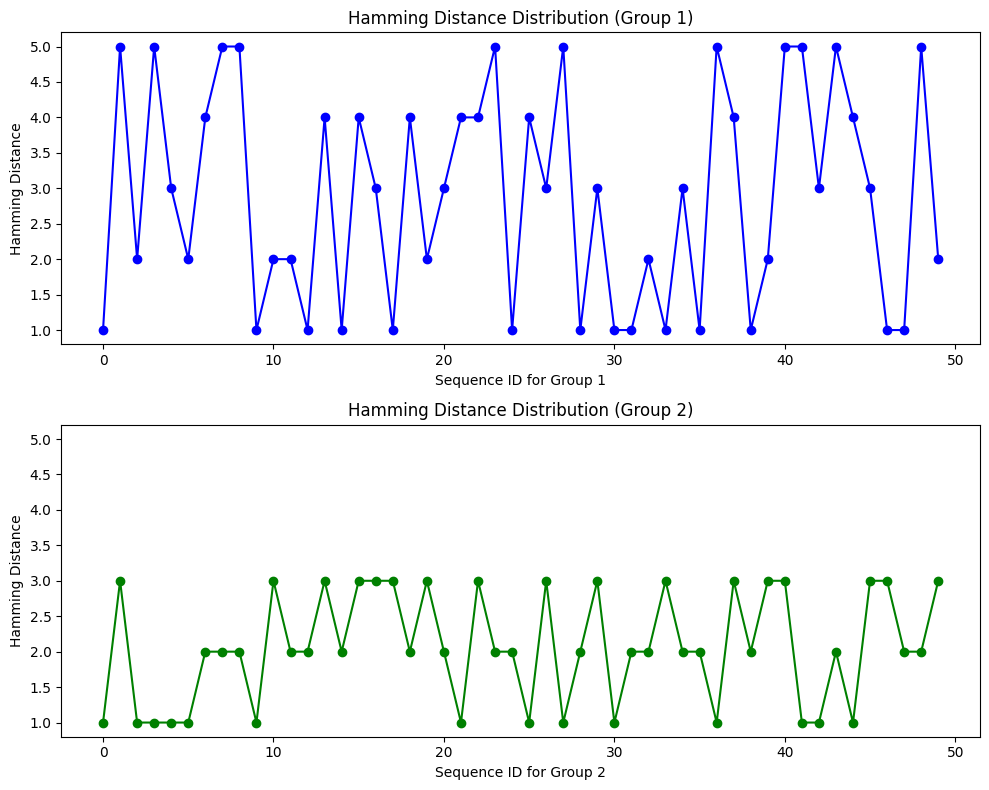

In [5]:
# Plotting Hamming Distance Distributions for each group
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharey=True)

ax[0].plot(hamming_distances_group1, color='blue', marker='o', linestyle='-')
ax[0].set_title("Hamming Distance Distribution (Group 1)")
ax[0].set_xlabel("Sequence ID for Group 1")
ax[0].set_ylabel("Hamming Distance")

ax[1].plot(hamming_distances_group2, color='green', marker='o', linestyle='-')
ax[1].set_title("Hamming Distance Distribution (Group 2)")
ax[1].set_xlabel("Sequence ID for Group 2")
ax[1].set_ylabel("Hamming Distance")

plt.tight_layout()
plt.show()



c. Plot Q30 quality scores for each library in the file

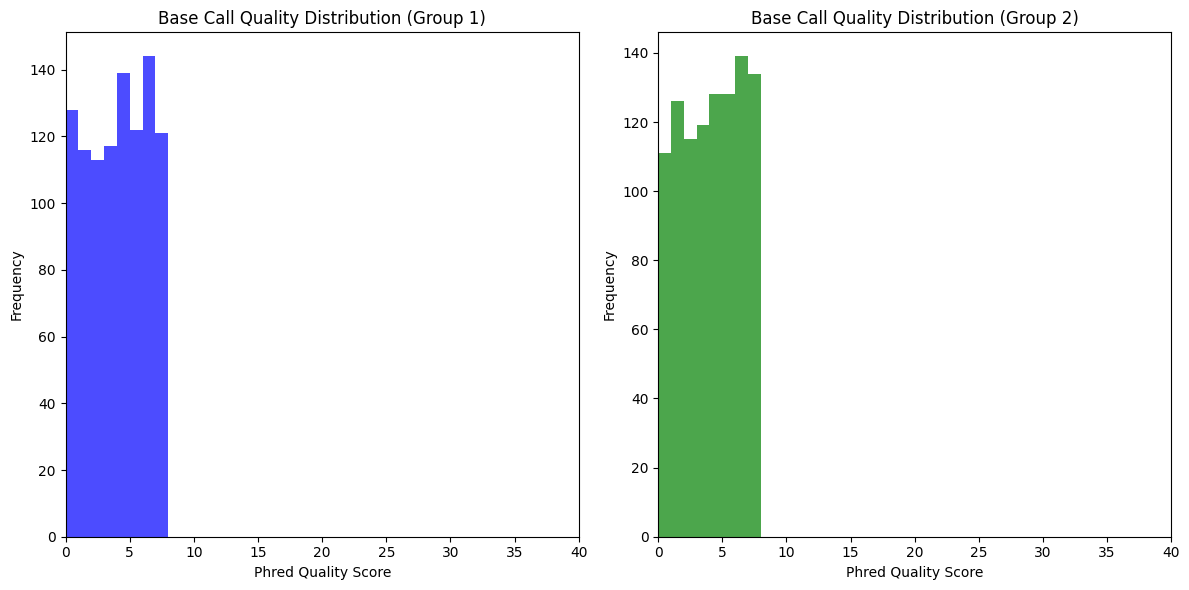

In [6]:
# Flatten the quality scores for plotting
quality_group_1_flat = [score for sublist in quality_group_1 for score in sublist]
quality_group_2_flat = [score for sublist in quality_group_2 for score in sublist]

# Plotting the base call quality distributions for each group
plt.figure(figsize=(12, 6))

# Plot for Group 1
plt.subplot(1, 2, 1)
plt.hist(quality_group_1_flat, bins=range(0, 42), color='blue', alpha=0.7)
plt.title("Base Call Quality Distribution (Group 1)")
plt.xlabel("Phred Quality Score")
plt.ylabel("Frequency")
plt.xlim(0, 40)

# Plot for Group 2
plt.subplot(1, 2, 2)
plt.hist(quality_group_2_flat, bins=range(0, 42), color='green', alpha=0.7)
plt.title("Base Call Quality Distribution (Group 2)")
plt.xlabel("Phred Quality Score")
plt.ylabel("Frequency")
plt.xlim(0, 40)

plt.tight_layout()
plt.show()